In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
df= pd.read_csv('Loan.csv')  #Importing dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
print(df.info())  #more info on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# To allow plotting inside the notebook
import warnings
warnings.filterwarnings("ignore")
# To ignore deprecation warnings

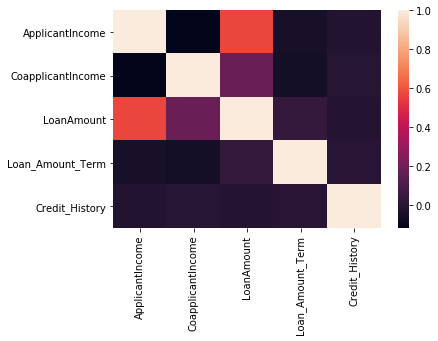

In [16]:
sns.heatmap(df.corr())

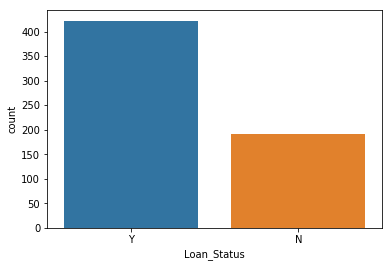

In [19]:
#Let's see the number of loans issued
#Count Plot
sns.countplot(x=df['Loan_Status'])

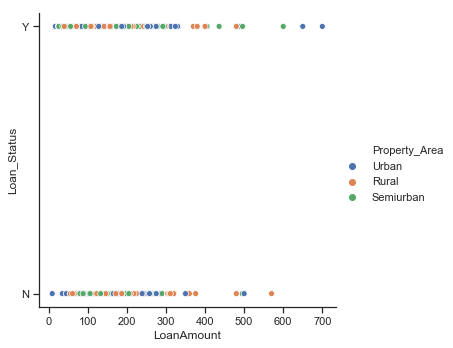

In [28]:
#Let's see if property area and laon amount jointly affects the loan issue
#Relational plot
sns.set(style="ticks")
sns.relplot(x='LoanAmount', y='Loan_Status',hue='Property_Area',data=df)

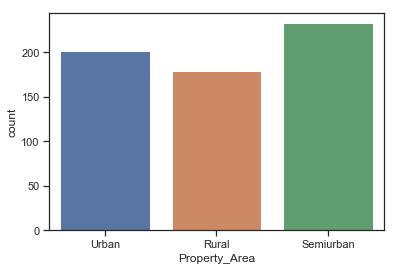

In [30]:
#Number of applications from each area
sns.countplot(x=df['Property_Area'])

Mean loan amount is:  146.41216216216216


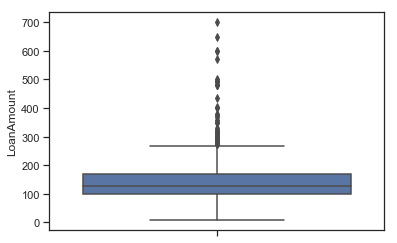

In [31]:
sns.boxplot(y=df['LoanAmount'])
print ("Mean loan amount is: ",df['LoanAmount'].mean())

In [32]:
print(df.shape)  #Rows and columns of data or data shape/size

(614, 13)


In [33]:
df.describe(include=['object'])## to include categorical variables as well-object represnts categorical

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002933,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [34]:
df.describe(include='int64')

,ApplicantIncome
count,614.000000
mean,5403.459283
std,6109.041673
min,150.000000
25%,2877.500000
50%,3812.500000
75%,5795.000000
max,81000.000000


In [35]:
df.describe(include='float64')

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,592.000000,600.00000,564.000000
mean,1621.245798,146.412162,342.00000,0.842199
std,2926.248369,85.587325,65.12041,0.364878
min,0.000000,9.000000,12.00000,0.000000
25%,0.000000,100.000000,360.00000,1.000000
50%,1188.500000,128.000000,360.00000,1.000000
75%,2297.250000,168.000000,360.00000,1.000000
max,41667.000000,700.000000,480.00000,1.000000


In [36]:
df.isnull().sum() #To display the null values present in the data

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
print(df.Gender.mode())
print(df.Married.mode())
print(df.Dependents.mode())
print(df.Education.mode())
print(df.Self_Employed.mode())
print(df.Property_Area.mode())

0    Male
dtype: object
0    Yes
dtype: object
0    0
dtype: object
0    Graduate
dtype: object
0    No
dtype: object
0    Semiurban
dtype: object


In [38]:
print(df.ApplicantIncome.mean())
print(df.CoapplicantIncome.mean())
print(df.LoanAmount.mean())
print(df.Loan_Amount_Term.mean())
print(df.Credit_History.mean())

5403.459283387622
1621.245798027101
146.41216216216216
342.0
0.8421985815602837


In [39]:
df['Gender']=df['Gender'].fillna(('Male'))
df['Married']=df['Married'].fillna(('Yes'))
df['Dependents']=df['Dependents'].fillna(('0'))
df['Self_Employed']=df['Self_Employed'].fillna(('No'))
df['Credit_History']=df['Credit_History'].fillna(('1'))
#Another method or shortcut statement
df['LoanAmount']=df['LoanAmount'].fillna((df['LoanAmount'].mean()))
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna((df['Loan_Amount_Term'].mean()))


In [40]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
df['ApplicantIncome']=df['ApplicantIncome'].astype('float64')

In [42]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.0,614,614
unique,614,2,2,4,2,2,3.0,3,2
top,LP002933,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,502,401,360,480,532,475.0,233,422


In [43]:
del df['Loan_ID']  #We do not need this column in modeling

In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null float64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), object(8)
memory usage: 57.7+ KB
None


In [45]:
#Numerical columns to new identifier coz to perform one hot encoding only for categorical variables
quantitative_columns=[col for col in df.columns.values if df[col].dtype=='float64']
df_num = df[quantitative_columns]
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,146.412162,360.0
1,4583.0,1508.0,128.000000,360.0
2,3000.0,0.0,66.000000,360.0
3,2583.0,2358.0,120.000000,360.0
4,6000.0,0.0,141.000000,360.0


In [46]:
## Categorical variables in another identifier/ qualitative data
categories_columns=[col for col in df.columns.values if df[col].dtype=='object']
df_cat = df[categories_columns]
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [47]:
#Creating dummy variables for categorical variables
data_cat_dummies = pd.get_dummies(df_cat,drop_first=True)
data_cat_dummies.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_1,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,0,0,1,0,0,1,1
1,1,1,1,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,1,1,0,0,1,1
3,1,1,0,0,0,1,0,1,0,0,1,1
4,1,0,0,0,0,0,0,1,0,0,1,1


In [48]:
#Now we concatenate all quanititative and qualitative data to form a new data
new_data=pd.concat([df_num, data_cat_dummies], axis=1)
new_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_1,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,146.412162,360.0,1,0,0,0,0,0,0,1,0,0,1,1
1,4583.0,1508.0,128.000000,360.0,1,1,1,0,0,0,0,1,0,0,0,0
2,3000.0,0.0,66.000000,360.0,1,1,0,0,0,0,1,1,0,0,1,1
3,2583.0,2358.0,120.000000,360.0,1,1,0,0,0,1,0,1,0,0,1,1
4,6000.0,0.0,141.000000,360.0,1,0,0,0,0,0,0,1,0,0,1,1


In [49]:
new_data.shape

(614, 16)

In [50]:
#Seperating the data into dependent and independent variables
x=new_data.iloc[:, :-1].values
y=new_data.iloc[:, -1].values

#Splitting the dataset into the training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [51]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

y_pred= classifier.predict(x_test)

In [52]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [53]:
#Summary of predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63        33
           1       0.84      0.96      0.90        90

    accuracy                           0.84       123
   macro avg       0.83      0.74      0.76       123
weighted avg       0.83      0.84      0.82       123

[[17 16]
 [ 4 86]]
accuracy is 0.8373983739837398


In [54]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                                    max_features=None, max_leaf_nodes=None,
                                    min_impurity_split=1e-07, min_samples_leaf=1,
                                    min_samples_split=2, random_state=None, splitter='best')
classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_test)

#Summary of prediction made by classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.38      0.52      0.44        33
           1       0.79      0.69      0.74        90

    accuracy                           0.64       123
   macro avg       0.59      0.60      0.59       123
weighted avg       0.68      0.64      0.66       123

[[17 16]
 [28 62]]
accuracy is 0.6422764227642277


Text(0.5,12.5,'Predicted label')

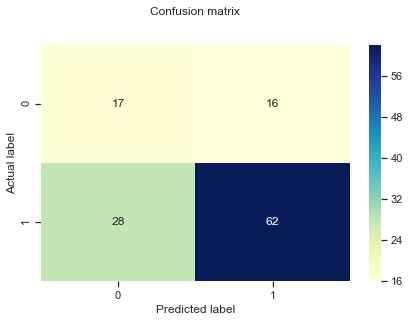

In [58]:
# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu", fmt="g")
# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')